In [1]:
import os
os.getcwd()

'C:\\Users\\dell'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To laod Dataset 
df=pd.read_csv("insurance.csv")
#To show first 5 records
df.head()

age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1

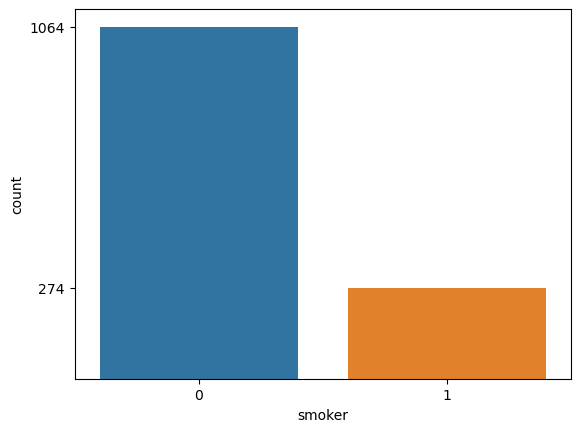

0    1064
1     274
Name: smoker, dtype: int64


In [12]:
sns.countplot(data=df,x='smoker')
f=df['smoker'].value_counts()
plt.yticks(f)
plt.show()
print(f)

In [13]:
sns.countplot(data=df,x='region')
f=df['region'].value_counts()
plt.yticks(f)
plt.show()
print(f)

2    364
3    325
1    325
0    324
Name: region, dtype: int64


In [ ]:
#bmi : body mass index 
#region
'''
east  : 0
west   :3
north  : 1
south  : 2
'''

In [4]:
#How many rows and columns in given dataset
df.shape

(1338, 8)

In [5]:
#How many samples of 1's and 0's in output column insuranceclaim
df['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

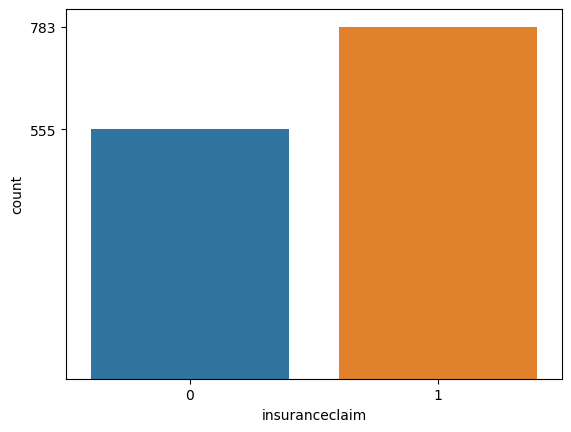

In [7]:
f=df['insuranceclaim'].value_counts() #frequency count 
#visualise 
sns.countplot(data=df,x='insuranceclaim')
plt.yticks(f)
plt.show()

In [10]:
sns.countplot(data=df,x='sex')
f=df['sex'].value_counts()
plt.yticks(f)
plt.show()
print(f)
#0 - FEMALE AND 1-MALE

1    676
0    662
Name: sex, dtype: int64


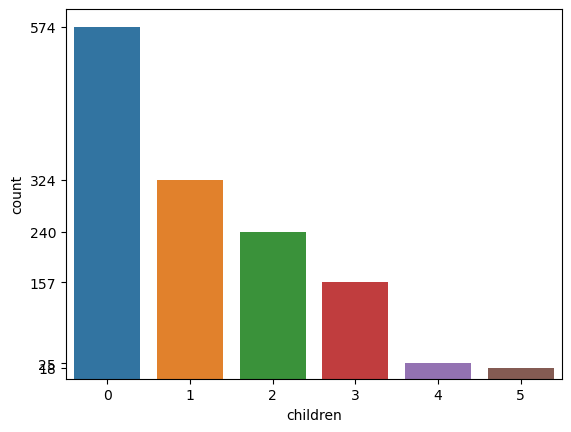

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [11]:
sns.countplot(data=df,x='children')
f=df['children'].value_counts()
plt.yticks(f)
plt.show()
print(f)

In [14]:
#Apply cleaning process means EDA 
#Step 1: To check null values 
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [15]:
#to check datatypes of each columns 
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

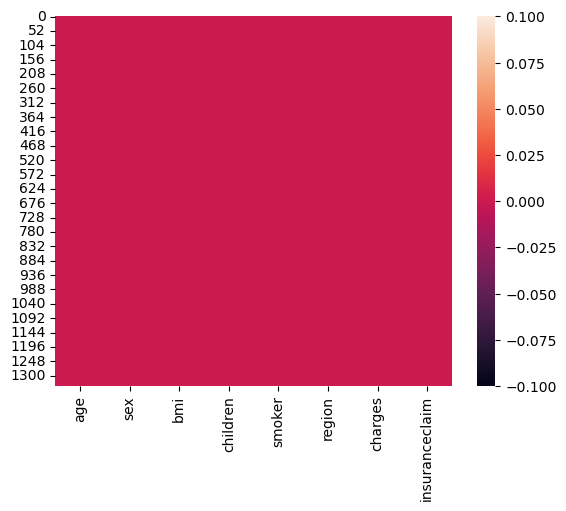

In [16]:
#visualise null values
sns.heatmap(df.isnull())
plt.show()

In [17]:
#step 2: to check duplicates rows/records in given dataset 
df.duplicated().sum()

1

In [18]:
#To show duplicates records
df[df.duplicated()]

age  sex    bmi  children  smoker  region    charges  insuranceclaim
581   19    1  30.59         0       0       1  1639.5631               1

In [19]:
#To remove duplicates rows permanently
df.drop_duplicates(inplace=True)

In [20]:
#Again to check duplicates rows/records in given dataset 
df.duplicated().sum()

0

In [21]:
df.head()

age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1

In [22]:
#Separate input and output from given dataframe df
X=df.drop("insuranceclaim",axis=1) #input : 2D 
Y=df['insuranceclaim'] #output : 1D 

In [23]:
X.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [24]:
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [26]:
X.shape,Y.shape

((1337, 7), (1337,))

In [27]:
#train test split : 70%-30% 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,
                                              random_state=1)

In [30]:
X_train.shape,Y_train.shape

((935, 7), (935,))

In [29]:
X_test.shape,Y_test.shape

((402, 7), (402,))

In [32]:
X_train.head()

age  sex     bmi  children  smoker  region      charges
520   50    0  27.360         0       0       0  25656.57526
575   58    0  27.170         0       0       1  12222.89830
770   61    1  36.100         3       0       3  27941.28758
314   27    0  31.400         0       1       3  34838.87300
426   38    0  27.265         1       0       0   6555.07035

In [33]:
#APply Scaling on input column of both X_train and X_test
#use StandardScaler class
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train) #training input
X_test=ss.transform(X_test) #testing input

In [34]:
X_train

array([[ 0.76935907, -1.05611771, -0.54584829, ..., -0.53158148,
        -1.38997482,  0.97973397],
       [ 1.34169182, -1.05611771, -0.57768002, ..., -0.53158148,
        -0.48304777, -0.11634023],
       [ 1.5563166 ,  0.94686415,  0.91841121, ..., -0.53158148,
         1.33080632,  1.16614713],
       ...,
       [-1.23380557,  0.94686415,  0.5280537 , ..., -0.53158148,
         0.42387927, -0.97698935],
       [ 0.05394313, -1.05611771, -1.40698031, ...,  1.88117914,
         0.42387927,  0.47286216],
       [ 1.41323342,  0.94686415,  1.76278969, ...,  1.88117914,
         0.42387927,  2.88193206]])

In [35]:
#perform the model with the help of Logistic Regression (type of 
#classification Algorithm)

#call LogisticRegression  inbuilt class
from sklearn.linear_model import LogisticRegression

In [36]:
#create the object of class LogisticRegression
lr=LogisticRegression()
#lr is a used defined object of LogisticRegression class

In [37]:
#Train the model with 70% training data(X_train,Y_train) , 
#use inbuilt method fit() of LogisticRegression class
lr.fit(X_train,Y_train)

LogisticRegression()

In [38]:
#Test the model with 30% data , use inbuilt method predict() of 
#LogisticRegression class , return output : value of probability (0-1)
#formula :  Y_pred= 1/(1+np.exp(-X_test))
#if(Y_pred<0.5 then Y_pred=0 else if Y_pred>=0.5 then Y_pred=1)

Y_pred=lr.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,